In [1]:
!pip install xgboost

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
df = pd.read_csv('/Users/theodorknobig/Documents/NOVA/T3/Machine Learning/ML_Group_250303/data/ndtv_data_final.csv')

# Drop any unnamed index columns
if any(col.startswith('Unnamed') for col in df.columns):
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics for numerical features:")
display(df.describe())

Dataset shape: (1359, 21)

First 5 rows:


,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990



Data types:
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

Missing values per column:
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Process

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


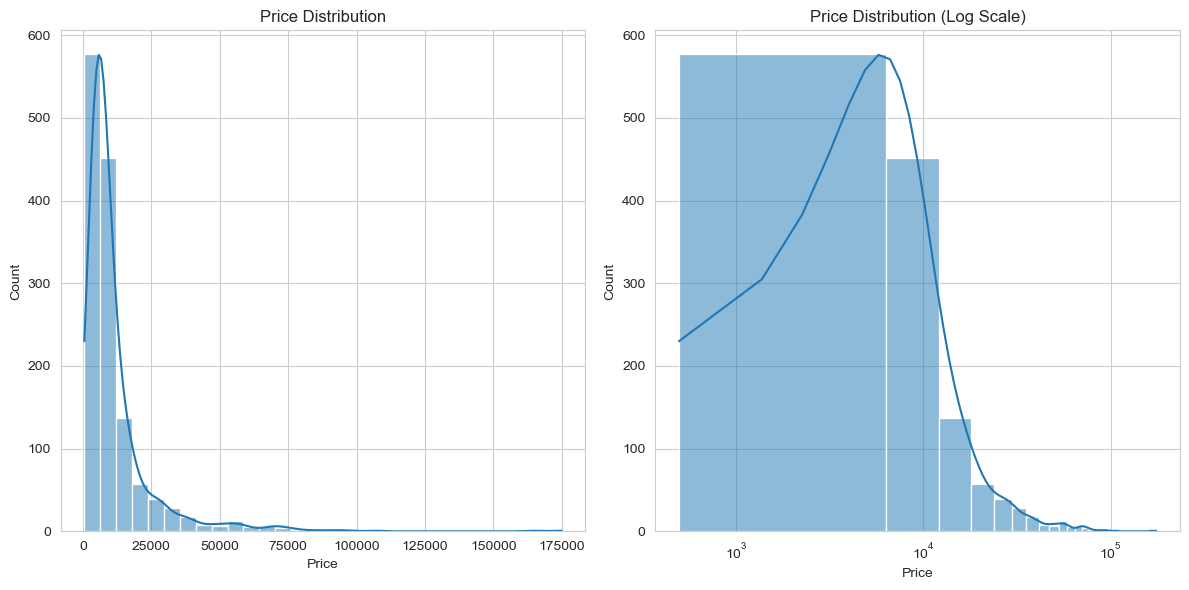

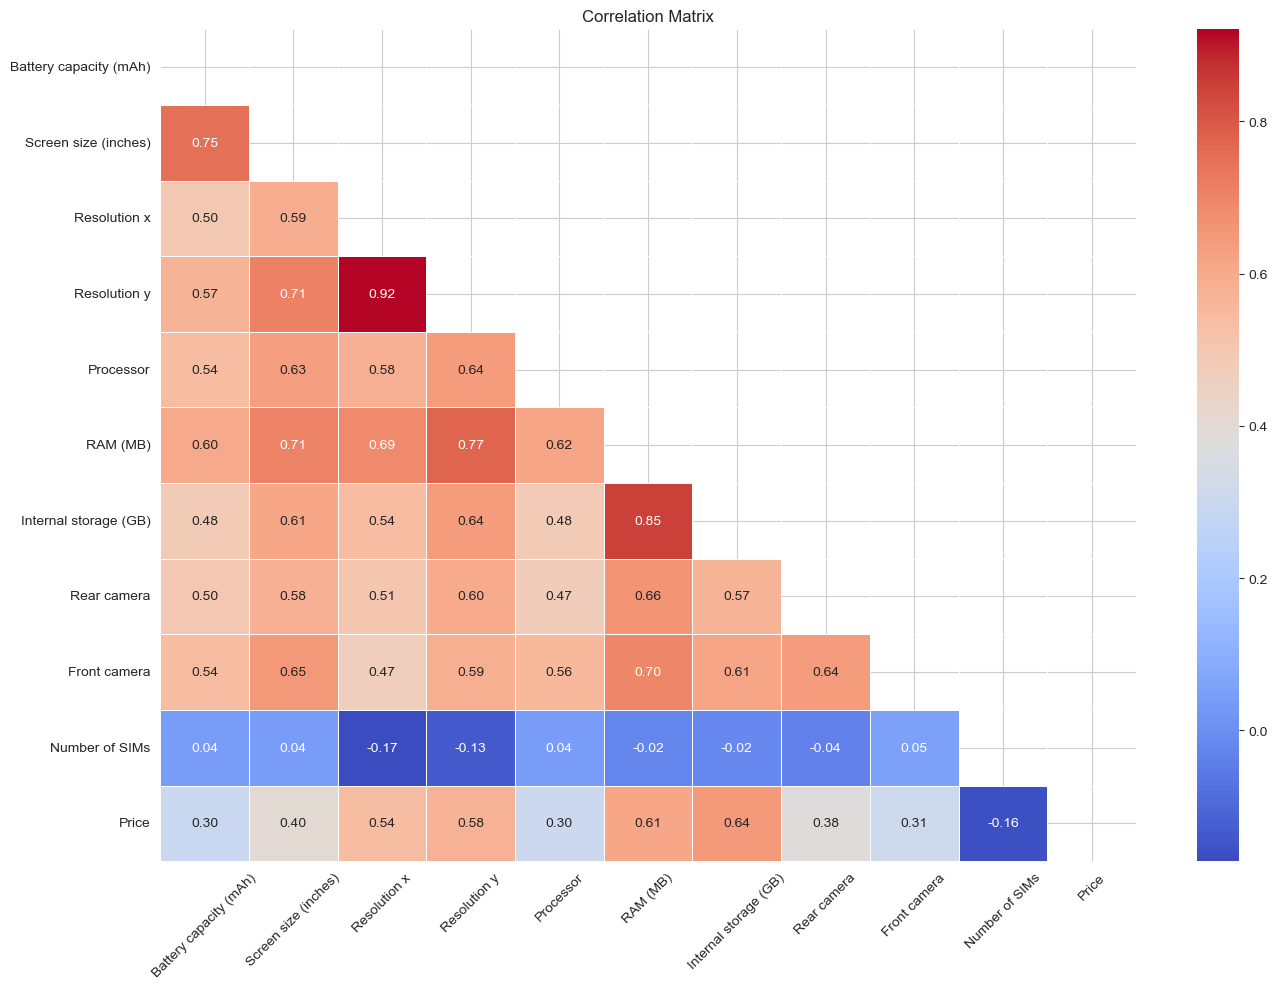

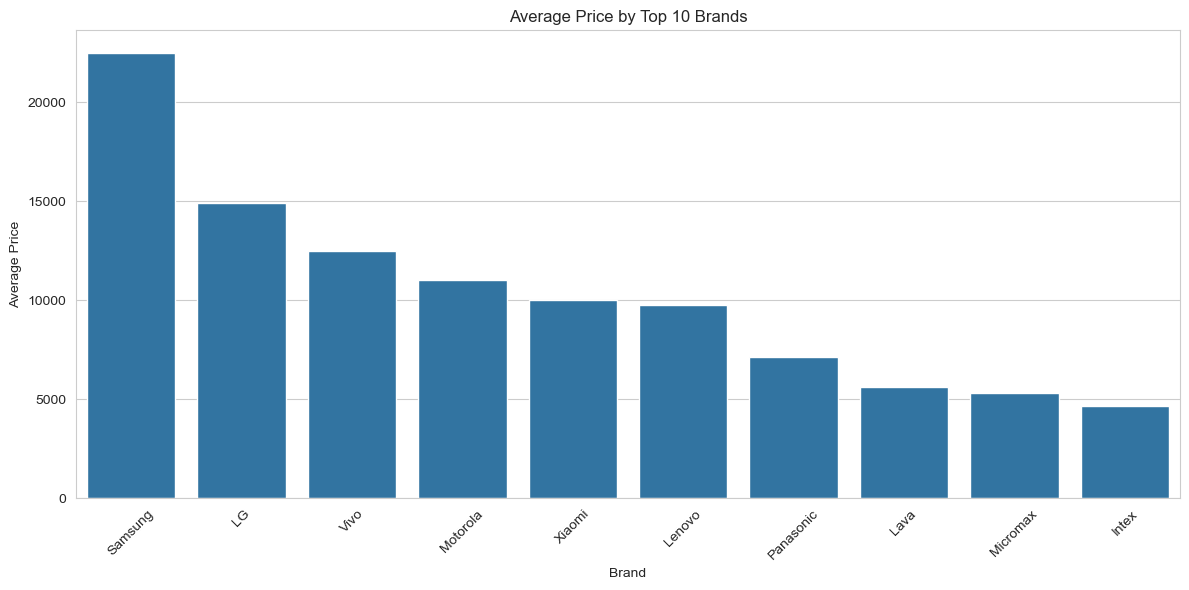

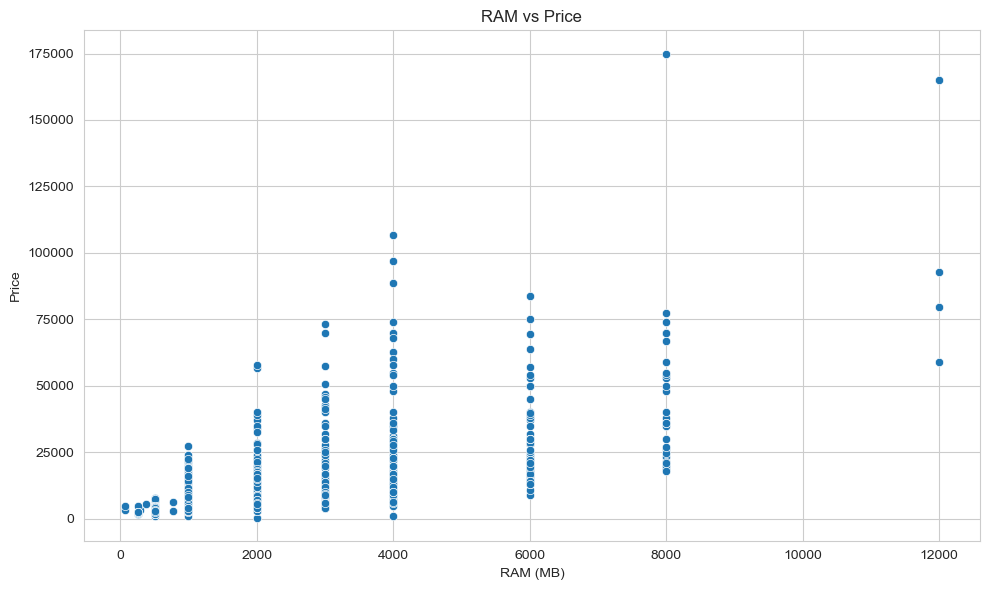

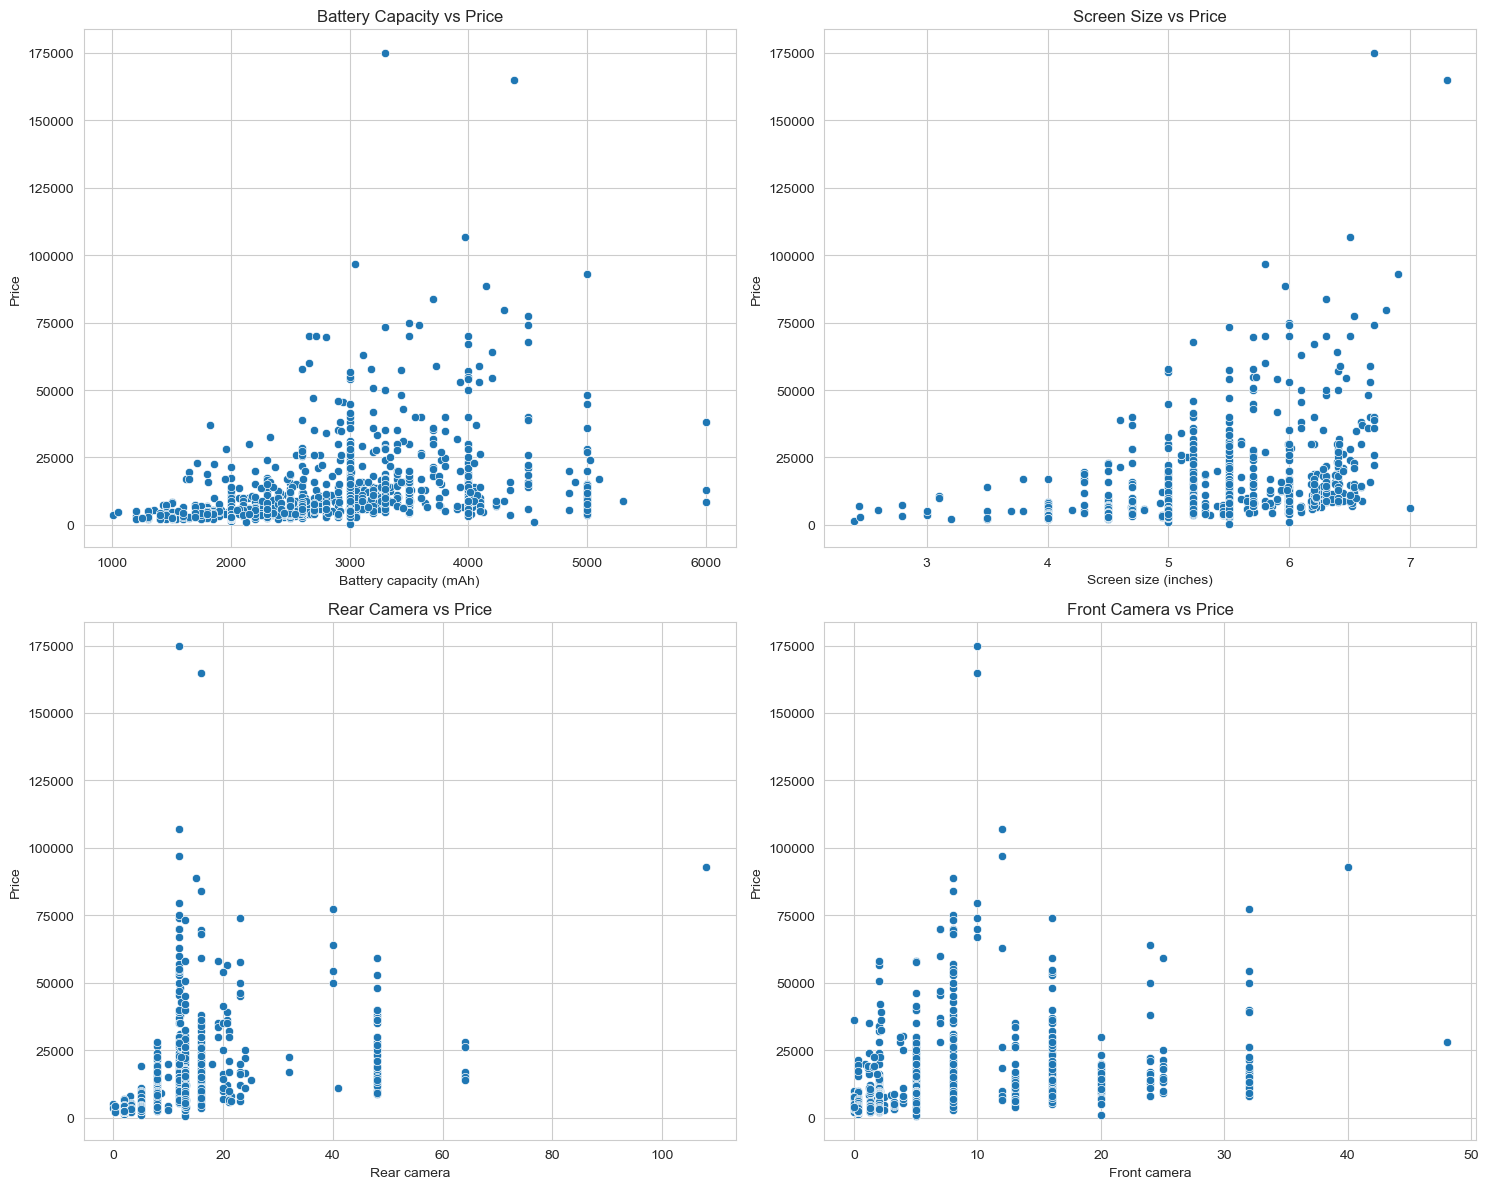

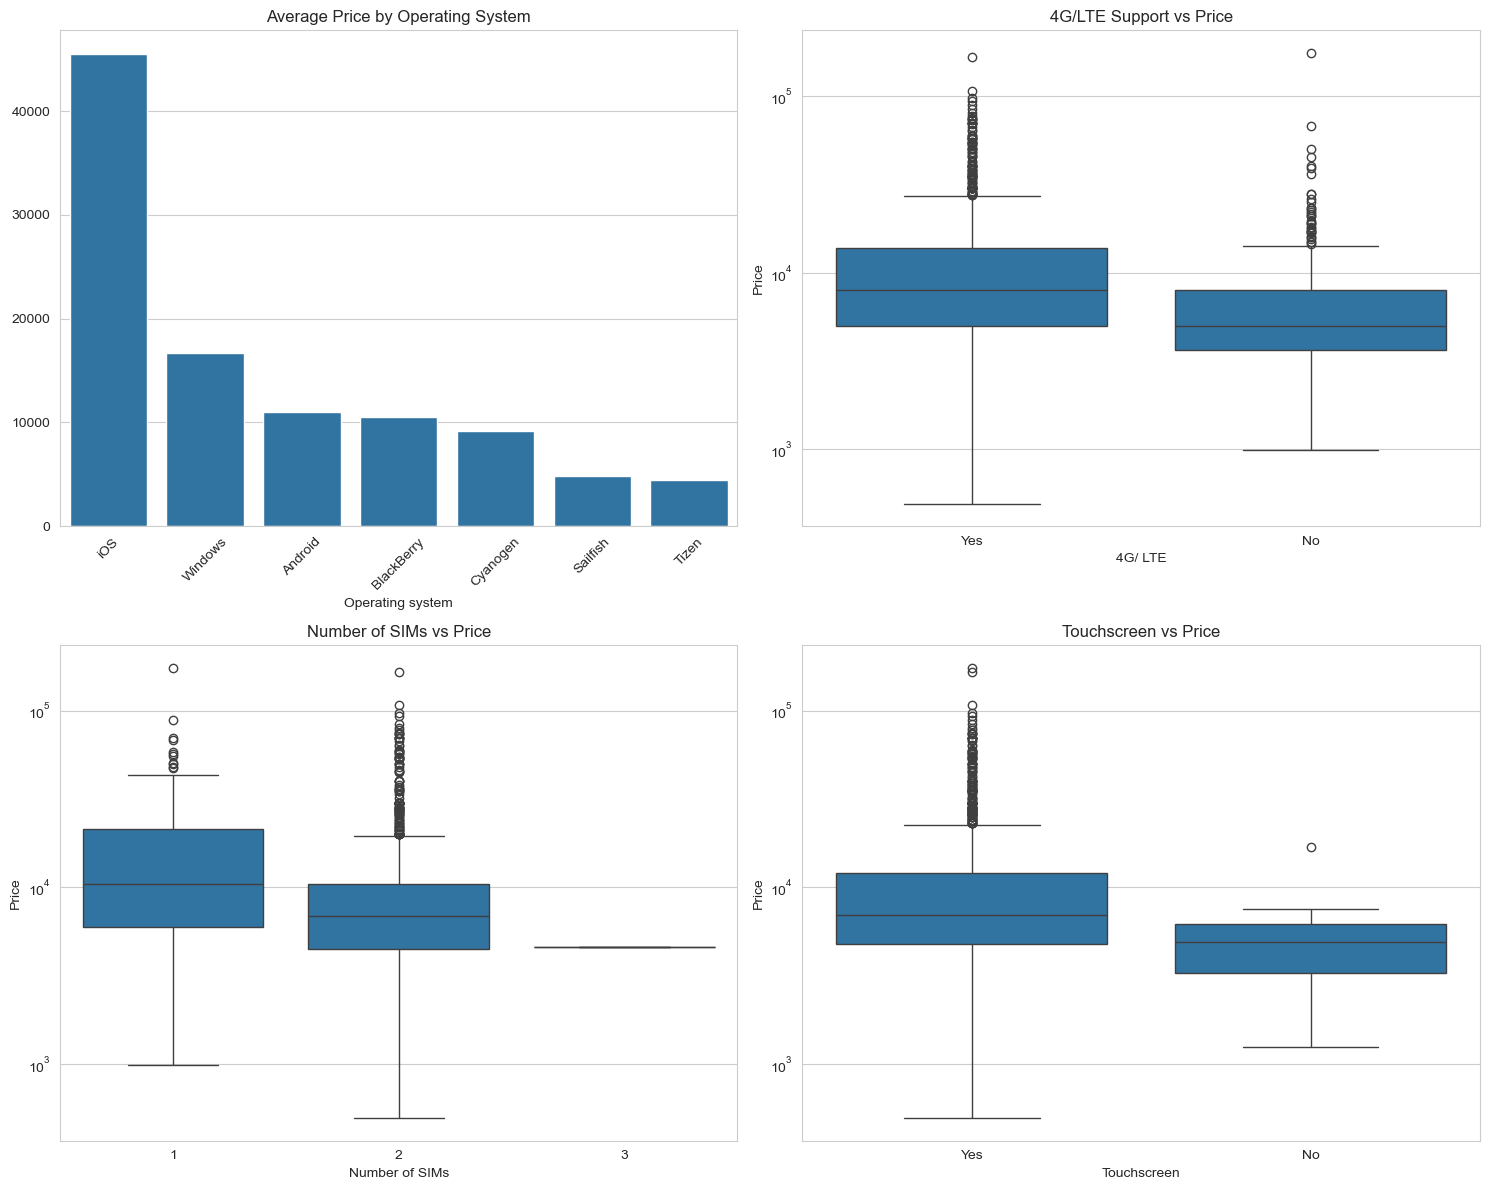

In [4]:
# Set the style for visualizations
sns.set_style('whitegrid')

# 1. Price Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution (Log Scale)')
plt.xlabel('Price')
plt.xscale('log')
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap for Numerical Features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Brand Analysis
top_brands = df['Brand'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
brand_price = df[df['Brand'].isin(top_brands)].groupby('Brand')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.index, y=brand_price.values)
plt.title('Average Price by Top 10 Brands')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# 4. RAM vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM (MB)', y='Price', data=df)
plt.title('RAM vs Price')
plt.xlabel('RAM (MB)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 5. Additional Feature Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Battery capacity vs Price
sns.scatterplot(x='Battery capacity (mAh)', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Battery Capacity vs Price')

# Screen size vs Price
sns.scatterplot(x='Screen size (inches)', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Screen Size vs Price')

# Rear camera vs Price
sns.scatterplot(x='Rear camera', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Rear Camera vs Price')

# Front camera vs Price
sns.scatterplot(x='Front camera', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Front Camera vs Price')

plt.tight_layout()
plt.show()

# 6. Categorical Feature Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Operating system vs Price
os_price = df.groupby('Operating system')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=os_price.index, y=os_price.values, ax=axes[0, 0])
axes[0, 0].set_title('Average Price by Operating System')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# 4G/LTE vs Price
sns.boxplot(x='4G/ LTE', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('4G/LTE Support vs Price')
axes[0, 1].set_yscale('log')

# Number of SIMs vs Price
sns.boxplot(x='Number of SIMs', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Number of SIMs vs Price')
axes[1, 0].set_yscale('log')

# Touchscreen vs Price
sns.boxplot(x='Touchscreen', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Touchscreen vs Price')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

Engineered features added:
- Pixel Density
- RAM to Storage Ratio
- Total Camera Quality
- High End Device
- Log Price


,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,GPS,Number of SIMs,3G,4G/ LTE,Price,Pixel Density,RAM to Storage Ratio,Total Camera Quality,High End Device,Log Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,...,1,2,1,1,58998,515.183966,0.045776,64.0,1,10.985276
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1,1080,2400,8,6000,...,1,2,1,1,27999,404.893148,0.091553,80.0,1,10.239960
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,...,1,2,1,1,106900,455.548515,0.061035,24.0,1,11.579658
3,iPhone 11,Apple,iPhone 11,3110,6.10,1,828,1792,6,4000,...,1,2,1,1,62900,323.613699,0.061035,24.0,1,11.049317
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,...,1,1,0,0,49990,402.688717,0.045776,44.0,1,10.819598


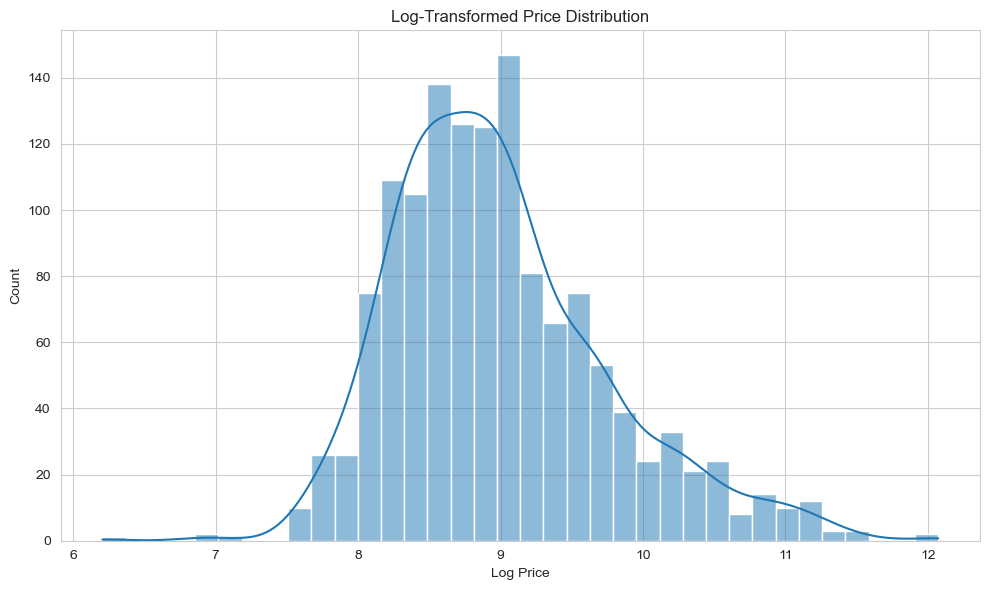

In [5]:
# Create a copy to avoid modifying the original dataframe
df_engineered = df.copy()

# 1. Convert binary categorical features to binary numeric
binary_features = ['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
for feature in binary_features:
    df_engineered[feature] = df_engineered[feature].map({'Yes': 1, 'No': 0})

# 2. Create pixel density feature (pixels per inch)
df_engineered['Pixel Density'] = np.sqrt(
    df_engineered['Resolution x']**2 + df_engineered['Resolution y']**2
) / df_engineered['Screen size (inches)']

# 3. Create RAM to storage ratio
df_engineered['RAM to Storage Ratio'] = df_engineered['RAM (MB)'] / (df_engineered['Internal storage (GB)'] * 1024)

# 4. Create total camera quality feature
df_engineered['Total Camera Quality'] = df_engineered['Rear camera'] + df_engineered['Front camera']

# 5. Create high-end flag feature (based on high RAM, storage, or camera)
ram_threshold = df_engineered['RAM (MB)'].quantile(0.75)
storage_threshold = df_engineered['Internal storage (GB)'].quantile(0.75)
camera_threshold = df_engineered['Rear camera'].quantile(0.75)

df_engineered['High End Device'] = ((df_engineered['RAM (MB)'] >= ram_threshold) | 
                                    (df_engineered['Internal storage (GB)'] >= storage_threshold) | 
                                    (df_engineered['Rear camera'] >= camera_threshold)).astype(int)

# 6. Create log-transformed price (for modeling)
df_engineered['Log Price'] = np.log1p(df_engineered['Price'])

# Display the engineered features
print("Engineered features added:")
for col in df_engineered.columns:
    if col not in df.columns:
        print(f"- {col}")

# Display the first few rows of the engineered dataset
display(df_engineered.head())

# Visualize the distribution of the log-transformed price
plt.figure(figsize=(10, 6))
sns.histplot(df_engineered['Log Price'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.tight_layout()
plt.show()

In [6]:
# Separate features and target
X = df_engineered.drop(['Name', 'Model', 'Price', 'Log Price'], axis=1)
y = df_engineered['Price']
y_log = df_engineered['Log Price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Create feature preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Numerical columns: ['Battery capacity (mAh)', 'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G', '4G/ LTE', 'Pixel Density', 'RAM to Storage Ratio', 'Total Camera Quality', 'High End Device']
Categorical columns: ['Brand', 'Operating system']
Training set shape: (1087, 22)
Testing set shape: (272, 22)


Training Random Forest (Baseline Model)...
Training Linear Regression Model...
Training XGBoost Model...
Training Neural Network Model with Softmax activation...
Training Random Forest on Log-transformed Price...
Training XGBoost on Log-transformed Price...

Model Evaluation Results:


,Model,MAE,RMSE,R^2,Accuracy (±10%),Accuracy (±20%)
3,Neural Network (MLP),4.332127e+03,8.305548e+03,7.382979e-01,17.647059,33.088235
2,XGBoost,3.489652e+03,9.065821e+03,6.881937e-01,23.161765,41.544118
0,Random Forest (Baseline),3.694990e+03,9.566158e+03,6.528272e-01,23.161765,42.647059
5,XGBoost (Log),3.869621e+03,1.060227e+04,5.735498e-01,22.794118,42.647059
4,Random Forest (Log),4.194658e+03,1.080207e+04,5.573257e-01,22.426471,40.808824
1,Linear Regression,9.366543e+11,8.918732e+12,-3.017705e+17,16.911765,28.676471



Improvement Compared to Baseline (Random Forest):


,Model,RMSE,RMSE Improvement (%),Accuracy (±10%),Accuracy (±20%)
3,Neural Network (MLP),8.305548e+03,1.317781e+01,17.647059,33.088235
2,XGBoost,9.065821e+03,5.230287e+00,23.161765,41.544118
0,Random Forest (Baseline),9.566158e+03,0.000000e+00,23.161765,42.647059
5,XGBoost (Log),1.060227e+04,-1.083101e+01,22.794118,42.647059
4,Random Forest (Log),1.080207e+04,-1.291960e+01,22.426471,40.808824
1,Linear Regression,8.918732e+12,-9.323212e+10,16.911765,28.676471


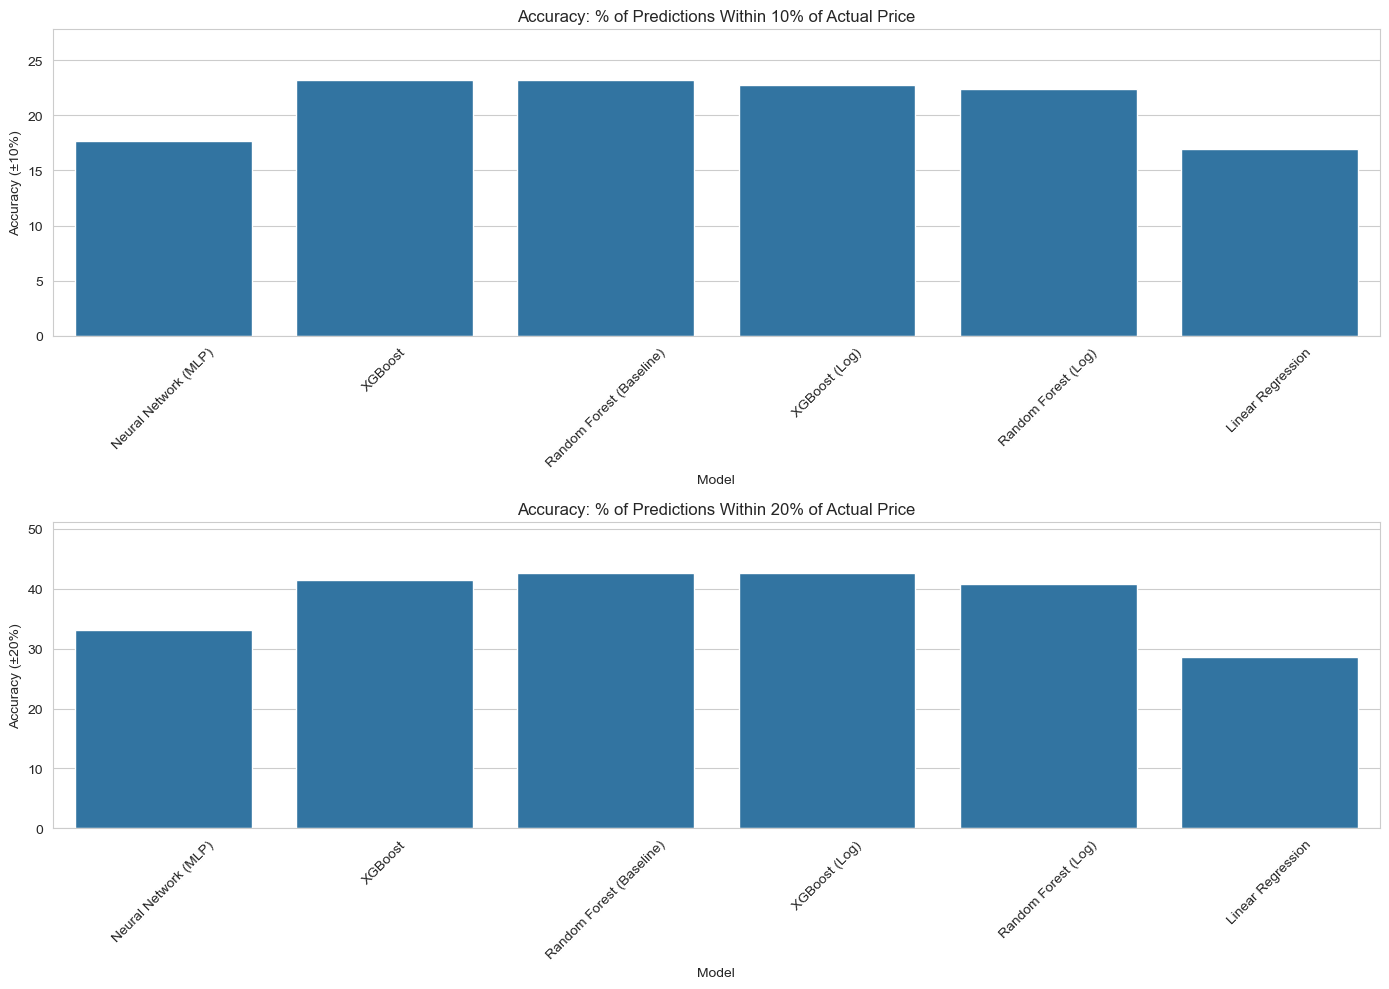

In [25]:
# Function to evaluate a model with accuracy metrics
def evaluate_model(model, X_test, y_test, is_log=False):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # If model was trained on log-transformed target, transform predictions back
    if is_log:
        y_pred = np.expm1(y_pred)
    
    # Calculate standard metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy-like metrics at different tolerance levels
    # Percentage of predictions within 10% of actual price
    accuracy_10pct = np.mean(np.abs(y_pred - y_test) <= 0.1 * y_test) * 100
    
    # Percentage of predictions within 20% of actual price
    accuracy_20pct = np.mean(np.abs(y_pred - y_test) <= 0.2 * y_test) * 100
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R^2': r2,
        'Accuracy (±10%)': accuracy_10pct,
        'Accuracy (±20%)': accuracy_20pct
    }

# Initialize dictionary to store models and results
models = {}
results = {}

# Model 1: Random Forest (Baseline)
print("Training Random Forest (Baseline Model)...")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
models['Random Forest (Baseline)'] = rf_pipeline
results['Random Forest (Baseline)'] = evaluate_model(rf_pipeline, X_test, y_test)

# Model 2: Linear Regression
print("Training Linear Regression Model...")
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_pipeline.fit(X_train, y_train)
models['Linear Regression'] = linear_pipeline
results['Linear Regression'] = evaluate_model(linear_pipeline, X_test, y_test)

# Model 3: XGBoost
print("Training XGBoost Model...")
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])
xgb_pipeline.fit(X_train, y_train)
models['XGBoost'] = xgb_pipeline
results['XGBoost'] = evaluate_model(xgb_pipeline, X_test, y_test)

# Model 4: Neural Network with Softmax activation (MLP Regressor)
print("Training Neural Network Model with Softmax activation...")
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), 
                              activation='relu', 
                              solver='adam', 
                              alpha=0.001, 
                              max_iter=500, 
                              random_state=42))
])
mlp_pipeline.fit(X_train, y_train)
models['Neural Network (MLP)'] = mlp_pipeline
results['Neural Network (MLP)'] = evaluate_model(mlp_pipeline, X_test, y_test)

# Model 5: Random Forest on Log Price
print("Training Random Forest on Log-transformed Price...")
rf_log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_log_pipeline.fit(X_train_log, y_train_log)
models['Random Forest (Log)'] = rf_log_pipeline
results['Random Forest (Log)'] = evaluate_model(rf_log_pipeline, X_test_log, y_test, is_log=True)

# Model 6: XGBoost on Log Price
print("Training XGBoost on Log-transformed Price...")
xgb_log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])
xgb_log_pipeline.fit(X_train_log, y_train_log)
models['XGBoost (Log)'] = xgb_log_pipeline
results['XGBoost (Log)'] = evaluate_model(xgb_log_pipeline, X_test_log, y_test, is_log=True)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[model]['MAE'] for model in results],
    'RMSE': [results[model]['RMSE'] for model in results],
    'R^2': [results[model]['R^2'] for model in results],
    'Accuracy (±10%)': [results[model]['Accuracy (±10%)'] for model in results],
    'Accuracy (±20%)': [results[model]['Accuracy (±20%)'] for model in results]
})

# Sort by RMSE (lower is better)
results_df = results_df.sort_values('RMSE')

# Print evaluation results
print("\nModel Evaluation Results:")
display(results_df)

# Compare with baseline
baseline_rmse = results['Random Forest (Baseline)']['RMSE']
results_df['RMSE Improvement (%)'] = ((baseline_rmse - results_df['RMSE']) / baseline_rmse * 100)

print("\nImprovement Compared to Baseline (Random Forest):")
display(results_df[['Model', 'RMSE', 'RMSE Improvement (%)', 'Accuracy (±10%)', 'Accuracy (±20%)']])

# Visualize accuracy metrics
plt.figure(figsize=(14, 10))

# Accuracy within 10% comparison
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Accuracy (±10%)', data=results_df)
plt.title('Accuracy: % of Predictions Within 10% of Actual Price')
plt.xticks(rotation=45)
plt.ylim(0, max(results_df['Accuracy (±10%)']) * 1.2)  # Set y-axis with some headroom

# Accuracy within 20% comparison
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='Accuracy (±20%)', data=results_df)
plt.title('Accuracy: % of Predictions Within 20% of Actual Price')
plt.xticks(rotation=45)
plt.ylim(0, max(results_df['Accuracy (±20%)']) * 1.2)  # Set y-axis with some headroom

plt.tight_layout()
plt.show()

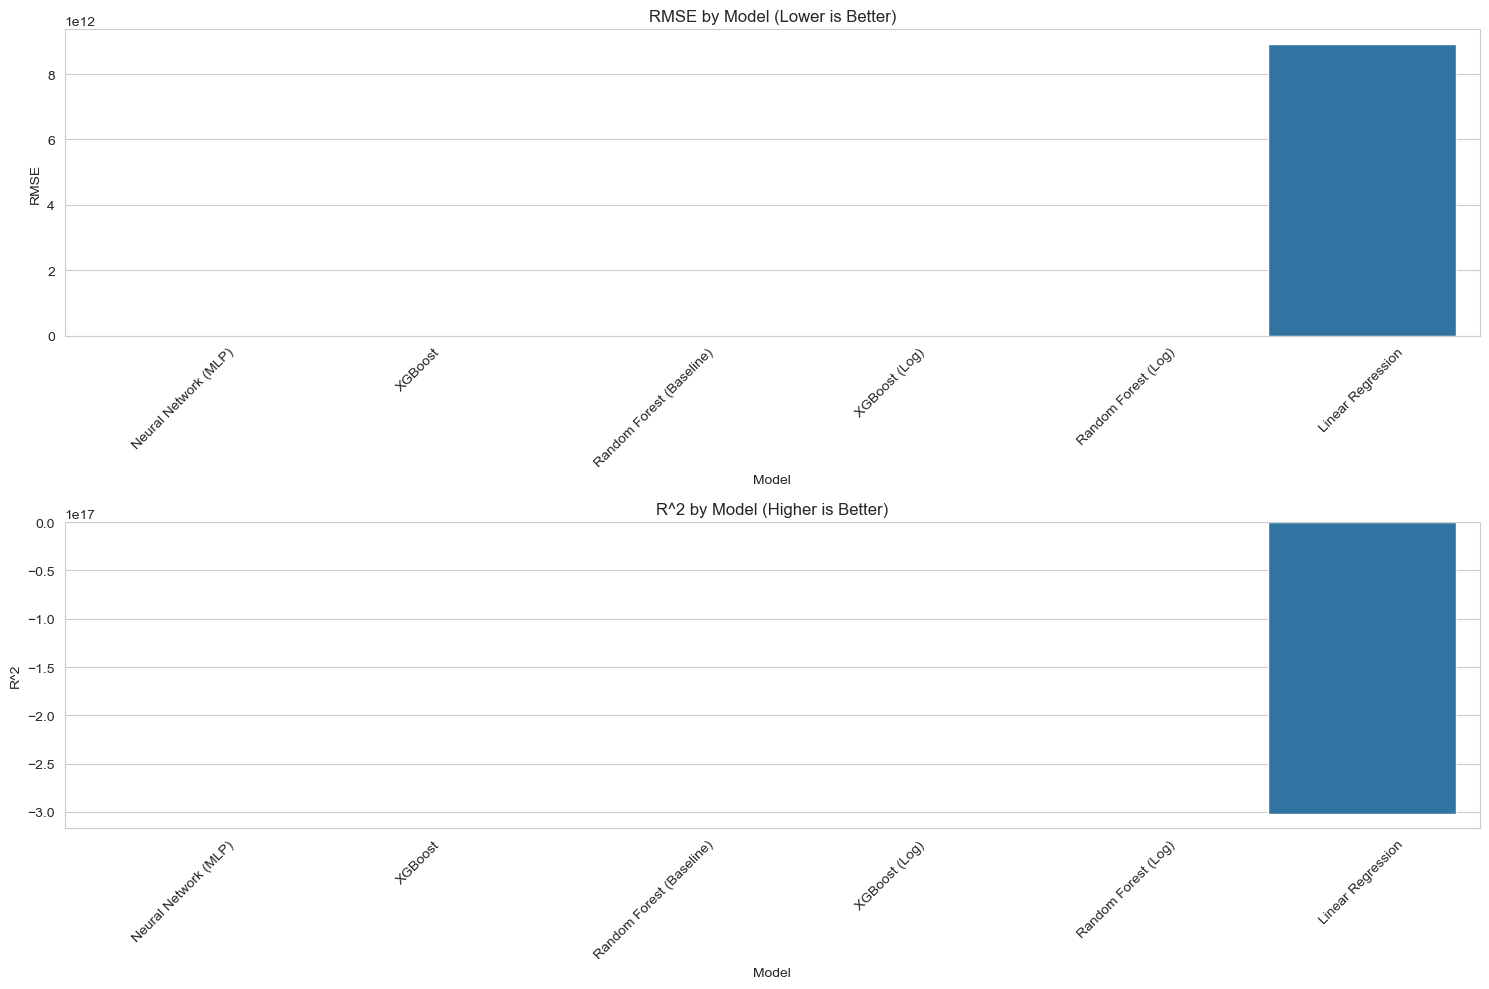

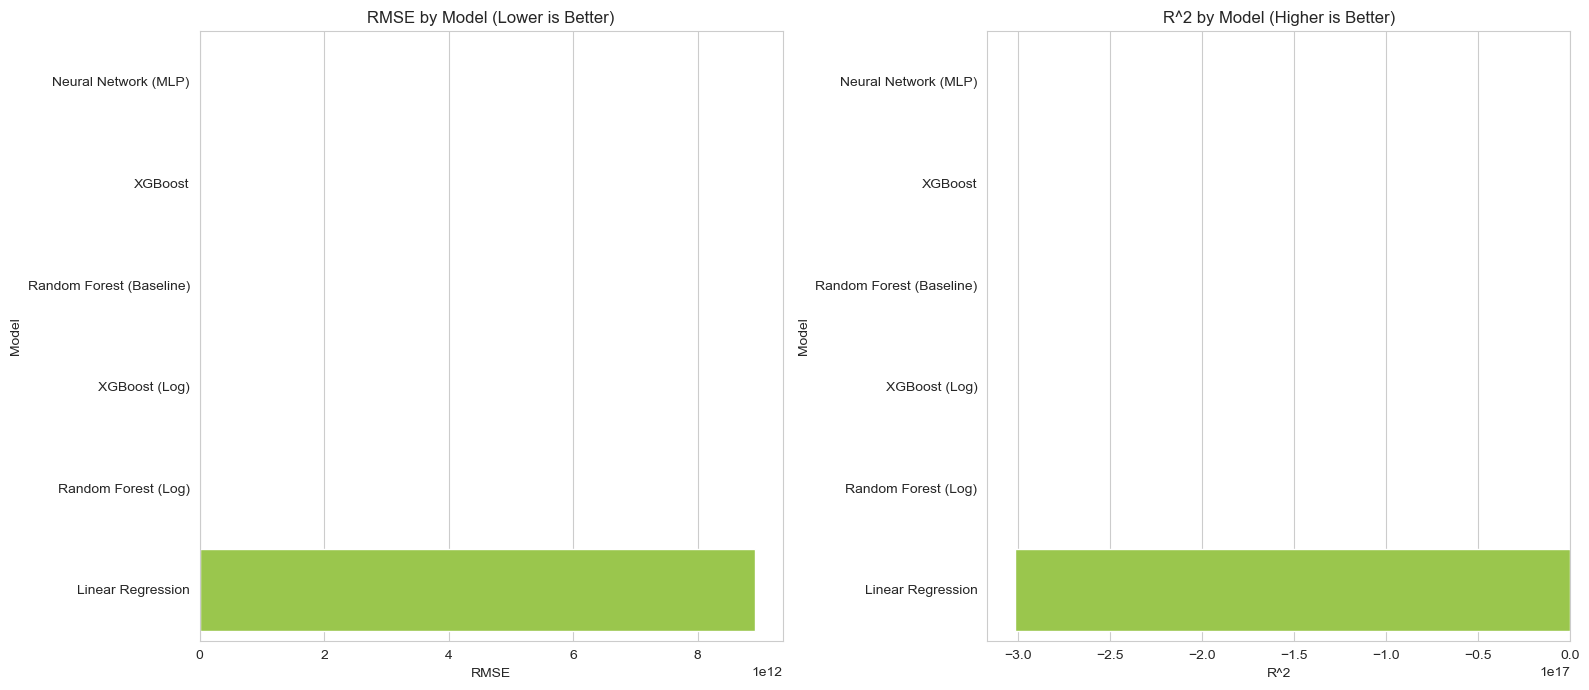

In [8]:
# Visualize model comparison
plt.figure(figsize=(15, 10))

# RMSE comparison
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE by Model (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

# R^2 comparison
plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='R^2', data=results_df)
plt.title('R^2 by Model (Higher is Better)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Create a more detailed performance comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot the RMSE values
sns.barplot(x='RMSE', y='Model', data=results_df, ax=axes[0], palette='viridis')
axes[0].set_title('RMSE by Model (Lower is Better)')
axes[0].set_xlabel('RMSE')
axes[0].set_ylabel('Model')

# Plot the R^2 values
sns.barplot(x='R^2', y='Model', data=results_df, ax=axes[1], palette='viridis')
axes[1].set_title('R^2 by Model (Higher is Better)')
axes[1].set_xlabel('R^2')
axes[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

In [9]:
# Analyze feature importance for the best model
best_model_name = results_df.iloc[0]['Model']
print(f"Analyzing feature importance for: {best_model_name}")

# Only proceed if the best model is tree-based
if any(model_type in best_model_name for model_type in ['Random Forest', 'XGBoost']):
    # Get the model
    best_model = models[best_model_name]
    
    # Get features processed by the preprocessor
    # This is a complex part - getting feature names after preprocessing
    # For tree-based models, we need to extract feature importances
    
    # First, identify if the model uses log-transformed target
    uses_log = 'Log' in best_model_name
    
    # Get feature names (this is a simplified approach)
    feature_names = numerical_cols.copy()
    
    # For categorical features, we'd ideally get one-hot encoded feature names
    # This is a simplified approach - in practice, you'd need to get the exact column names
    for cat_col in categorical_cols:
        unique_values = df_engineered[cat_col].unique()
        for val in unique_values:
            feature_names.append(f"{cat_col}_{val}")
    
    # Get feature importances from the model
    importances = best_model.named_steps['regressor'].feature_importances_
    
    # Create a simplified version for display
    # Use only the first N feature importances where N = len(feature_names)
    n_features = min(len(importances), len(feature_names))
    
    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[:n_features],
        'Importance': importances[:n_features]
    }).sort_values('Importance', ascending=False)
    
    # Display top features
    print("\nTop 15 Important Features:")
    display(feature_importance_df.head(15))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Most Important Features for {best_model_name}')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance analysis is only available for tree-based models.")
    print(f"The best model ({best_model_name}) is not tree-based.")

Analyzing feature importance for: Neural Network (MLP)
Feature importance analysis is only available for tree-based models.
The best model (Neural Network (MLP)) is not tree-based.


In [10]:
# Step 9: Faster Hyperparameter Tuning for Best Model

# Determine the type of the best model for hyperparameter tuning
if 'Random Forest' in best_model_name:
    model_type = 'rf'
    param_grid = {
        'regressor__n_estimators': [100, 200],  # Reduced options
        'regressor__max_depth': [10, 20]  # Reduced options
    }
    base_model = RandomForestRegressor(random_state=42)
elif 'Gradient Boosting' in best_model_name:  # Assuming you're using GradientBoostingRegressor instead of XGBoost
    model_type = 'gbm'
    param_grid = {
        'regressor__n_estimators': [100, 200],  # Reduced options
        'regressor__max_depth': [3, 5]  # Reduced options
    }
    base_model = GradientBoostingRegressor(random_state=42)
elif 'Neural Network' in best_model_name:
    model_type = 'mlp'
    param_grid = {
        'regressor__hidden_layer_sizes': [(50,), (100, 50)],  # Reduced options
        'regressor__alpha': [0.001, 0.01]  # Reduced options
    }
    base_model = MLPRegressor(random_state=42, max_iter=300)  # Reduced max_iter
else:
    model_type = 'lr'
    param_grid = {}  # Linear regression doesn't have many hyperparameters
    base_model = LinearRegression()

print(f"Quick hyperparameter tuning for {model_type} model...")

# Determine if we need to use log-transformed data
uses_log = 'Log' in best_model_name
X_train_tuning = X_train_log if uses_log else X_train
y_train_tuning = y_train_log if uses_log else y_train

# Create pipeline for search
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', base_model)
])

# Only perform search if there are parameters to tune
if param_grid and model_type != 'lr':
    # Import RandomizedSearchCV for faster tuning
    from sklearn.model_selection import RandomizedSearchCV
    
    # Use RandomizedSearchCV instead of GridSearchCV
    random_search = RandomizedSearchCV(
        pipeline, param_grid, 
        n_iter=5,  # Only try 5 combinations
        cv=3,      # Use 3-fold CV instead of 5
        scoring='neg_root_mean_squared_error',
        n_jobs=-1 if model_type != 'mlp' else 1,
        random_state=42
    )
    
    print("Running quick randomized search...")
    random_search.fit(X_train_tuning, y_train_tuning)
    
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best cross-validation score: {-random_search.best_score_:.4f} RMSE")
    
    # Get the tuned model
    tuned_model = random_search.best_estimator_
else:
    print("Using default parameters (no tuning needed)...")
    pipeline.fit(X_train_tuning, y_train_tuning)
    tuned_model = pipeline

# Evaluate on test set
X_test_tuning = X_test_log if uses_log else X_test
results_tuned = evaluate_model(tuned_model, X_test_tuning, y_test, is_log=uses_log)

print("\nTuned Model Performance:")
print(f"MAE: {results_tuned['MAE']:.2f}")
print(f"RMSE: {results_tuned['RMSE']:.2f}")
print(f"R^2: {results_tuned['R^2']:.4f}")

# Compare with untuned model
print("\nImprovement from Hyperparameter Tuning:")
original_rmse = results[best_model_name]['RMSE']
improvement = (original_rmse - results_tuned['RMSE']) / original_rmse * 100
print(f"RMSE Improvement: {improvement:.2f}%")

Quick hyperparameter tuning for mlp model...
Running quick randomized search...
Best parameters: {'regressor__hidden_layer_sizes': (100, 50), 'regressor__alpha': 0.01}
Best cross-validation score: 9539.0637 RMSE

Tuned Model Performance:
MAE: 5119.82
RMSE: 10062.12
R^2: 0.6159

Improvement from Hyperparameter Tuning:
RMSE Improvement: -21.15%


In [11]:
def recommend_phones(df, user_preferences, budget, top_n=5):
    """Recommend phones based on user preferences and budget"""
    # Filter by budget
    df_filtered = df[df['Price'] <= budget].copy()
    
    if df_filtered.empty:
        print(f"No phones found within your budget of {budget}. Try increasing your budget.")
        return None
    
    # Calculate scores based on preferences
    score = pd.Series(0, index=df_filtered.index)
    
    # Weight features based on user preferences
    weights = {
        'battery': 0.0,
        'camera': 0.0,
        'screen': 0.0,
        'performance': 0.0,
        'storage': 0.0
    }
    
    # Update weights based on user preferences
    for pref in user_preferences:
        weights[pref] = 1.0
    
    # Normalize feature values for scoring
    if weights['battery'] > 0:
        battery_max = df_filtered['Battery capacity (mAh)'].max()
        score += weights['battery'] * (df_filtered['Battery capacity (mAh)'] / battery_max)
    
    if weights['camera'] > 0:
        camera_max = df_filtered['Rear camera'].max()
        score += weights['camera'] * (df_filtered['Rear camera'] / camera_max)
    
    if weights['screen'] > 0:
        screen_max = df_filtered['Screen size (inches)'].max()
        resolution_max = (df_filtered['Resolution x'] * df_filtered['Resolution y']).max()
        
        # Combine screen size and resolution
        score += 0.5 * weights['screen'] * (df_filtered['Screen size (inches)'] / screen_max)
        score += 0.5 * weights['screen'] * ((df_filtered['Resolution x'] * df_filtered['Resolution y']) / resolution_max)
    
    if weights['performance'] > 0:
        processor_max = df_filtered['Processor'].max()
        ram_max = df_filtered['RAM (MB)'].max()
        
        # Combine processor and RAM
        score += 0.5 * weights['performance'] * (df_filtered['Processor'] / processor_max)
        score += 0.5 * weights['performance'] * (df_filtered['RAM (MB)'] / ram_max)
    
    if weights['storage'] > 0:
        storage_max = df_filtered['Internal storage (GB)'].max()
        score += weights['storage'] * (df_filtered['Internal storage (GB)'] / storage_max)
    
    # Add score to dataframe
    df_filtered['Score'] = score
    
    # Sort by score and return top N recommendations
    recommendations = df_filtered.sort_values('Score', ascending=False).head(top_n)
    
    return recommendations[['Name', 'Brand', 'Price', 'Score'] + 
                          [col for col in df_filtered.columns if any(pref in col.lower() for pref in user_preferences)]]

# Test recommendation system with different user preferences
print("\nPhone Recommendation Examples:")

# Example 1: Performance-focused user with medium budget
print("\nExample 1: Performance-focused user with medium budget")
user_prefs1 = ['performance', 'storage']
budget1 = 20000
recommendations1 = recommend_phones(df, user_prefs1, budget1)
display(recommendations1)

# Example 2: Camera enthusiast with higher budget
print("\nExample 2: Camera enthusiast with higher budget")
user_prefs2 = ['camera', 'screen']
budget2 = 40000
recommendations2 = recommend_phones(df, user_prefs2, budget2)
display(recommendations2)

# Example 3: Battery focused user with lower budget
print("\nExample 3: Battery focused user with lower budget")
user_prefs3 = ['battery', 'performance']
budget3 = 10000
recommendations3 = recommend_phones(df, user_prefs3, budget3)
display(recommendations3)


Phone Recommendation Examples:

Example 1: Performance-focused user with medium budget


,Name,Brand,Price,Score,Internal storage (GB)
250,Oppo F15,Oppo,18690,1.900,128.0
251,Vivo S1 Pro,Vivo,18599,1.900,128.0
696,Oppo R17,Oppo,17990,1.900,128.0
280,Meizu M16th,Meizu,19990,1.900,128.0
298,Huawei Nova 3,Huawei,15999,1.775,128.0



Example 2: Camera enthusiast with higher budget


,Name,Brand,Price,Score,Screen size (inches),Touchscreen,Rear camera,Front camera
629,Samsung Galaxy A70s,Samsung,25999,1.634821,6.70,Yes,64.0,32.0
68,Poco X2,Poco,15999,1.632679,6.67,Yes,64.0,20.0
1,Realme X2 Pro,Realme,27999,1.620536,6.50,Yes,64.0,16.0
82,Redmi Note 8 Pro,Xiaomi,13999,1.618772,6.53,Yes,64.0,20.0
81,Realme XT,Realme,14999,1.609487,6.40,Yes,64.0,16.0



Example 3: Battery focused user with lower budget


,Name,Brand,Price,Score,Battery capacity (mAh)
621,Tecno Spark Power,Tecno,8499,1.733333,6000
157,Xiaomi Mi Max 2,Xiaomi,8999,1.616667,5300
158,Coolpad Cool Play 6,Coolpad,8999,1.576667,4060
659,10.or G2,10.or,7999,1.566667,5000
74,Realme 5s,Realme,9999,1.566667,5000


In [23]:
# Summarize the key findings
print("## Mobile Phone Price Prediction and Recommendation System - Summary ##")
print("\n1. Model Performance:")
display(results_df[['Model', 'RMSE', 'R^2', 'RMSE Improvement (%)']])

print("\n

SyntaxError: unterminated string literal (detected at line 6) (1599249.py, line 6)